# Customer Behavior

## Introducing The Problem

When you buy a product online and find yourself disappointed in it, do you deal with the hassle of shipping it back, or just take the loss and move on? I want to create a classification model that is able to predict whether a customer will return a product based on various factors. I aim to explore specific questions such as: 

- Are expensive products more susceptible to returns? 
- Is there a particular demographic that exhibits a higher tendency to return products?


## Introducing The Data

In [1]:
#import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ecommerce_customer_data_large.csv')

In [3]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [4]:
df.shape

(250000, 13)

I’m going to be using an E-commerce customer behavior dataset found on [Kaggle](https://www.kaggle.com/datasets/shriyashjagtap/e-commerce-customer-for-behavior-analysis). The data consists of 250k rows and 13 columns:

- Customer ID: A unique identifier for each customer.
- Customer Name: The name of the customer.
- Customer Age: The age of the customer.
- Gender: The gender of the customer.
- Purchase Date: The date of each purchase made by the customer.
- Product Category: The category or type of the purchased product.
- Product Price: The price of the purchased product.
- Quantity: The quantity of the product purchased.
- Total Purchase Amount: The total amount spent by the customer in each transaction.
- Payment Method: The method of payment used by the customer (e.g., credit card, PayPal).
- Returns: Whether the customer returned any products from the order (binary: 0 for no return, 1 for return).
- Churn: A binary column indicating whether the customer has churned (0 for retained, 1 for churned).

## Data Pre-Processing

Before making any models or visualizations, let's clean the data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [6]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [7]:
df.drop("Customer Age", axis=1, inplace=True)

Arbitrarily dropping the customer age because we already have an age column. According to the describe function, both columns have the same statistics.

In [9]:
df.isna().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

Checking for nulls, the only column with null values is the returns column with 47,382 null values.

In [10]:
missing = df[df["Returns"].isna()]
complete = df[~df["Returns"].isna()]

In [11]:
missing.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn
count,47382.000000,47382.000000,47382.000000,47382.000000,0.0,47382.000000,47382.000000
mean,25006.906610,254.074163,2.990038,2723.535857,NaN,43.714259,0.198092
std,14413.206153,141.813230,1.416356,1443.904518,NaN,15.402575,0.398566
min,1.000000,10.000000,1.000000,100.000000,NaN,18.000000,0.000000
25%,12547.500000,131.000000,2.000000,1471.000000,NaN,30.000000,0.000000
50%,24979.500000,254.000000,3.000000,2717.000000,NaN,44.000000,0.000000
75%,37433.000000,376.000000,4.000000,3974.000000,NaN,57.000000,0.000000
max,50000.000000,500.000000,5.000000,5349.000000,NaN,70.000000,1.000000


In [12]:
complete.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn
count,202618.000000,202618.000000,202618.000000,202618.000000,202618.000000,202618.000000,202618.000000
mean,25020.140234,254.899066,3.008420,2725.817662,0.500824,43.817923,0.201088
std,14412.388674,141.720425,1.414339,1442.268491,0.500001,15.356067,0.400815
min,1.000000,10.000000,1.000000,100.000000,0.000000,18.000000,0.000000
25%,12599.250000,133.000000,2.000000,1478.000000,0.000000,30.000000,0.000000
50%,25018.000000,255.000000,3.000000,2727.000000,1.000000,44.000000,0.000000
75%,37444.000000,377.000000,4.000000,3975.000000,1.000000,57.000000,0.000000
max,50000.000000,500.000000,5.000000,5350.000000,1.000000,70.000000,1.000000


Comparing the statistics of rows with non-null return values and rows with null return values. Given that the information seems to be evenly distributed across all columns, we can fill half of the 47,382 with a 0 (no return), and the other half with a 1 (return).

In [13]:
null_count = df['Returns'].isna().sum()
half_null_count =  null_count // 2

null_indices = df[df['Returns'].isna()].index

# Assign 0 to the first half and 1 to the second half
df.loc[null_indices[:half_null_count], 'Returns'] = 0.0
df.loc[null_indices[half_null_count:], 'Returns'] = 1.0

In [14]:
df.isna().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [15]:
df_model = df.drop(columns=["Customer ID","Payment Method","Customer Name","Purchase Date"])

Dropping irrelevant columns as our last step in preprocessing.

## Data Visualizations

<Axes: xlabel='Product Category', ylabel='count'>

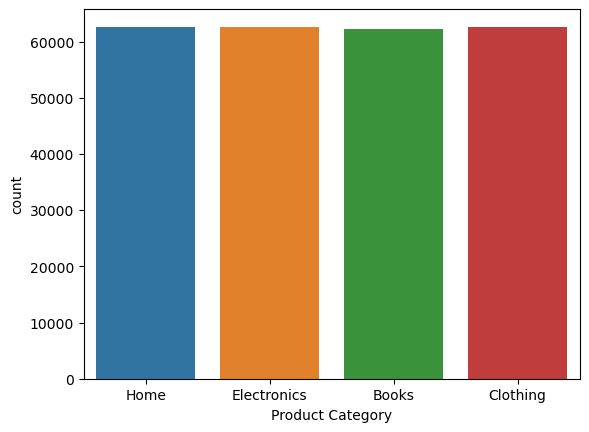

In [16]:
sns.countplot(x=df["Product Category"])

Looks like the data is spread evenly in terms of product categories. Each category has over 60,000 transactions.

<Axes: xlabel='Product Category', ylabel='Returns'>

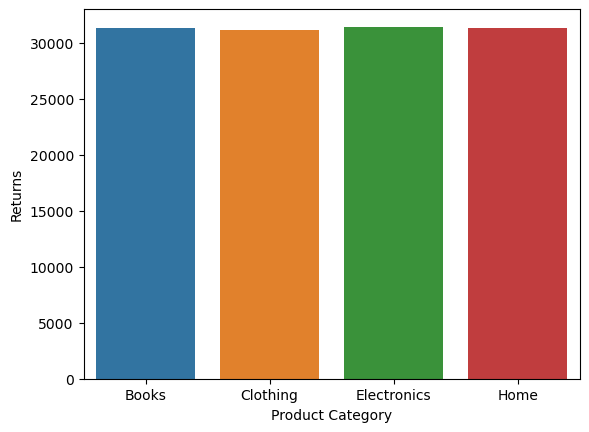

In [17]:
df_returns = df[df["Returns"] == 1.0]
df_categories = df_returns.groupby("Product Category").count()
df_category_returns = df_categories["Returns"].reset_index()
sns.barplot(x=df_category_returns["Product Category"], y=df_category_returns["Returns"])

In [18]:
print(df_category_returns)

  Product Category  Returns
0            Books    31320
1         Clothing    31115
2      Electronics    31410
3             Home    31322


Again, the data is spread evenly for returns in each product category.

<Axes: xlabel='Gender', ylabel='Returns'>

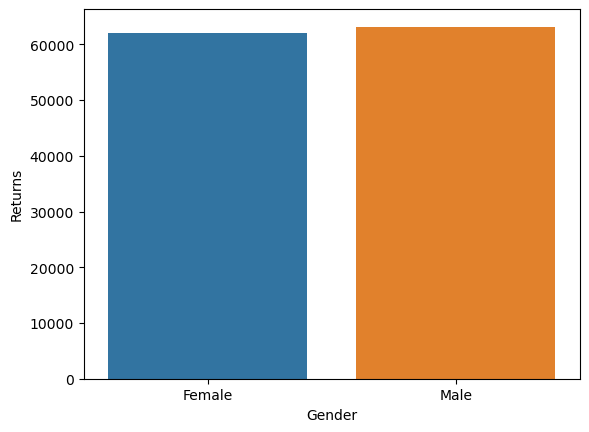

In [19]:
df_gender = df_returns.groupby("Gender").count()
df_gender_returns = df_gender["Returns"].reset_index()
sns.barplot(x=df_gender_returns["Gender"], y=df_gender_returns["Returns"])

In [20]:
print(df_gender_returns)

   Gender  Returns
0  Female    62001
1    Male    63166


Although the data is spread evenly, males tend to return products at a slightly higher rate than females.

<Axes: xlabel='price_group', ylabel='Returns'>

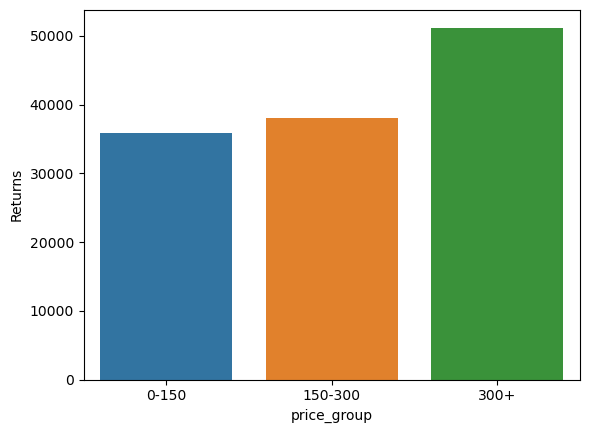

In [21]:
#Set price ranges
price_ranges = [0,150,300, np.inf]

#Set price range labels, keeping in mind the most expensive product is at $500
range_labels = ['0-150','150-300','300+']

#add price range column to df
df['price_group'] = pd.cut(df["Product Price"], bins=price_ranges,labels=range_labels)

#make new returns df with new price group column
df_returns_group = df[df["Returns"] == 1.0]

#group by price_group and count instances for each group
df_price_group = df_returns_group.groupby('price_group').count()

#reset index
df_count_price = df_price_group["Returns"].reset_index()

sns.barplot(x=df_count_price["price_group"], y=df_count_price["Returns"])

As seen from the bar plot, the higher-end products tend to get returned more often. The products ranging from 0-150 and 150-300 had similar return rates but the 150-300 range had slightly higher rates.

## Modeling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics

In [23]:
df_model.head()

,Product Category,Product Price,Quantity,Total Purchase Amount,Returns,Age,Gender,Churn
0,Home,177,1,2427,1.0,31,Female,0
1,Electronics,174,3,2448,1.0,31,Female,0
2,Books,413,1,2345,1.0,31,Female,0
3,Electronics,396,3,937,0.0,31,Female,0
4,Books,259,4,2598,1.0,31,Female,0


I'm going to be starting off using a decision tree model because I want to gain insight on what features leads to a product return. First, I need to encode the non-numerical values.

In [24]:
df_encoded = pd.get_dummies(df_model, columns=['Product Category','Gender'])

In [25]:
df_encoded.head()

,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Gender_Female,Gender_Male
0,177,1,2427,1.0,31,0,0,0,0,1,1,0
1,174,3,2448,1.0,31,0,0,0,1,0,1,0
2,413,1,2345,1.0,31,0,1,0,0,0,1,0
3,396,3,937,0.0,31,0,0,0,1,0,1,0
4,259,4,2598,1.0,31,0,1,0,0,0,1,0


Now I can separate my features and my target.

In [26]:
X = df_encoded.drop(columns=["Returns"])
y = df_encoded["Returns"]

And train the model using X and y.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [28]:
feature_names = X.columns.tolist()
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,6), dpi=3000)
tree.plot_tree(clf, max_depth = 1, feature_names = feature_names, filled=True)

[Text(0.5, 0.8333333333333334, 'Product Price <= 290.5\ngini = 0.5\nsamples = 200000\nvalue = [99866, 100134]'),
 Text(0.25, 0.5, 'Total Purchase Amount <= 128.5\ngini = 0.5\nsamples = 114713\nvalue = [57548, 57165]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'Total Purchase Amount <= 153.5\ngini = 0.5\nsamples = 85287\nvalue = [42318, 42969]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

At this current iteration, it looks like the most important feature was whether the product price was less than or equal to 290.5. If so, it checks if the total purchase amount is less than or equal to 128.5. If the product price is greater than 290.5, it checks if the total purchase amount was less than or equal to 153.5.

This supports the argument found in the data visualization section that found a higher return rate in expensive products (300+ USD).

I initially planned to model with SVM and KNN but they are extremely inefficient for large datasets and this dataset has 250k rows. We'll continue with Logistic Regression using the same data we used for the decision tree and see how they compare.

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

In [33]:
from sklearn.metrics import classification_report

In [34]:
y_pred_clf = clf.predict(X_test)
y_pred_log = logreg.predict(X_test)

First, we can start off with a simple accuracy score, which entails how often our models prediction were correct.

In [35]:
print("Accuracy for Decision Tree:", metrics.accuracy_score(y_test, y_pred_clf))
print("Accuracy for Logistic Regression:", metrics.accuracy_score(y_test, y_pred_log))

Accuracy for Decision Tree: 0.50054
Accuracy for Logistic Regression: 0.50342


Surprisingly, both models have an accuracy score of .5 meaning they were accurate only 50% of the time.

In this specific project, we care more about accurately predicting a return, even if it means misclassifying a non-return as a return, so we're going to focus on recall. Recall measures the proportion of actual positives that are correctly identified by the model.

In [36]:
print("Classification report for Decision Tree \n", classification_report(y_test, y_pred_clf))
print("Classification report for Logistic Regression \n",classification_report(y_test, y_pred_log))

Classification report for Decision Tree 
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     24967
         1.0       0.50      0.50      0.50     25033

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000

Classification report for Logistic Regression 
               precision    recall  f1-score   support

         0.0       0.50      0.34      0.41     24967
         1.0       0.50      0.66      0.57     25033

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.49     50000
weighted avg       0.50      0.50      0.49     50000



Out of the non-returns, row 0, for the decision tree, out of all the actual instances where the product did not get returned, the model correctly identified 50% of them as non-returns. For returned products, it accurately identified 50% of returned products as well.

For the logistic regression model, out of the actual non-returns, the model correctly identified only 34% of them as non-returns. On the other hand, out of actual returns, the model correctly identified 66% of them as actual returns.

Comparing both models, we can see that the logistic regression model fits better for our needs, as it can identify returned products at a higher rate.

## Storytelling and Conclusion

I was able to have answered my initial questions, that is, "Are expensive products more susceptible to returns?" and "Is there a particular demographic that exhibits a higher tendency to return products?" We found that products priced between 300 - 500 were more likely to get returned compared to products in ranges 0-150 and 150-300. We also found that males and females tend to have similar return rates with males having a slightly higher rate. One thing that could have been improved is filling in the null return values in a more strategic manner rather than just filling in the first half with 0's and the second half with 1's. During this project, I learned how to manipulate data to create my own category ranges. This helped when trying to answer if expensive products were more susceptible to returns. Throughout this class, I was able to learn how data can be used to uncover trends and patterns that may not be easily visible to the human eye. Data mining and machine learning models can be beneficial to almost anyone on the planet, given that they are able to ask the right questions, find and clean the right data, and use the right model(s).

## Impact

I can see how this can have a negative impact in that it might lead to retailers not wanting to sell to a specific demographic because they may have a higher chance of returning a product. In terms of a positive impact, it can help small business owners have a better idea of what their bottom line may look like at the end of a quarter/year.